## EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
sns.set(color_codes=True)

In [2]:
loan = pd.read_csv("train.csv")

In [3]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
loan.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
loan = loan.drop(["Loan_ID","Gender","Married","Dependents"], axis=1)

In [8]:
loan

,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...
609,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [9]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


   ###                   renaming the columns

In [10]:
loan = loan.rename(columns={"ApplicantIncome" : "income", "CoapplicantIncome" : "co_income", "LoanAmount" : "amount"})

In [11]:
loan = loan.rename(columns={"Loan_Amount_Term" : "term", "Credit_History" : "history", "Property_Area" : "area"})

In [12]:
loan = loan.rename(columns={"Loan_Status" : "status"})

In [13]:
loan.head(2)

,Education,Self_Employed,income,co_income,amount,term,history,area,status
0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [14]:
loan.shape

(614, 9)

In [15]:
loan.count()

Education        614
Self_Employed    582
income           614
co_income        614
amount           592
term             600
history          564
area             614
status           614
dtype: int64

###          removing duplicate and null values

In [16]:
duplicate_rows_loan = loan[loan.duplicated()]
print("number of duplicate rows:", duplicate_rows_loan.shape)

number of duplicate rows: (1, 9)


In [17]:
loan = loan.drop_duplicates()

In [18]:
loan["amount"].fillna(loan["amount"].mean(), inplace = True)

In [19]:
loan["term"].fillna(loan["term"].mean(), inplace = True)

In [20]:
loan["history"].fillna(loan["history"].mean(), inplace = True)

In [21]:
loan["Self_Employed"].fillna(loan["Self_Employed"].mode()[0], inplace = True)

In [22]:
loan.count()

Education        613
Self_Employed    613
income           613
co_income        613
amount           613
term             613
history          613
area             613
status           613
dtype: int64

In [23]:
print(loan.isnull().sum())

Education        0
Self_Employed    0
income           0
co_income        0
amount           0
term             0
history          0
area             0
status           0
dtype: int64


###     removing outliers and plots

In [24]:
loan["total_income"] = loan["income"] + loan["co_income"]

In [25]:
loan = loan.drop(["income","co_income",], axis=1)

In [26]:
loan.head()

,Education,Self_Employed,amount,term,history,area,status,total_income
0,Graduate,No,146.473773,360.0,1.0,Urban,Y,5849.0
1,Graduate,No,128.000000,360.0,1.0,Rural,N,6091.0
2,Graduate,Yes,66.000000,360.0,1.0,Urban,Y,3000.0
3,Not Graduate,No,120.000000,360.0,1.0,Urban,Y,4941.0
4,Graduate,No,141.000000,360.0,1.0,Urban,Y,6000.0


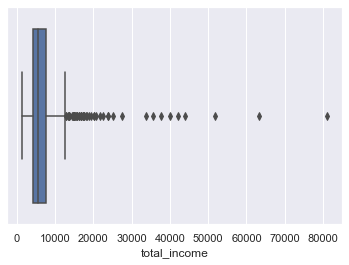

In [27]:
sns.boxplot(x = loan["total_income"])

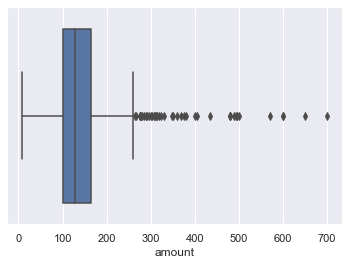

In [28]:
sns.boxplot(x = loan["amount"])

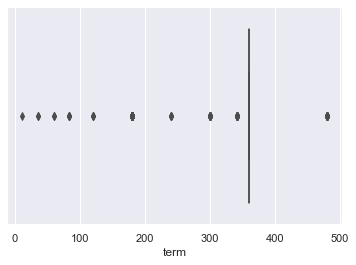

In [29]:
sns.boxplot(x = loan["term"])

In [30]:
Q1 = loan.quantile(0.25)
Q3 = loan.quantile(0.75)
IQR = Q3-Q1
print(IQR)

amount            65.0
term               0.0
history            0.0
total_income    3369.0
dtype: float64


In [31]:
loan = loan[~((loan < (Q1-1.5 * IQR)) |(loan > (Q3+1.5 * IQR))).any(axis = 1)]
loan.shape

(357, 8)

In [32]:
loan

,Education,Self_Employed,amount,term,history,area,status,total_income
0,Graduate,No,146.473773,360.0,1.0,Urban,Y,5849.0
1,Graduate,No,128.000000,360.0,1.0,Rural,N,6091.0
2,Graduate,Yes,66.000000,360.0,1.0,Urban,Y,3000.0
3,Not Graduate,No,120.000000,360.0,1.0,Urban,Y,4941.0
4,Graduate,No,141.000000,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...
607,Not Graduate,No,157.000000,360.0,1.0,Rural,Y,5398.0
608,Graduate,No,108.000000,360.0,1.0,Rural,Y,5182.0
609,Graduate,No,71.000000,360.0,1.0,Rural,Y,2900.0
611,Graduate,No,253.000000,360.0,1.0,Urban,Y,8312.0


,amount,term,history,total_income
amount,1.000000,NaN,NaN,0.678356
term,NaN,NaN,NaN,NaN
history,NaN,NaN,NaN,NaN
total_income,0.678356,NaN,NaN,1.000000


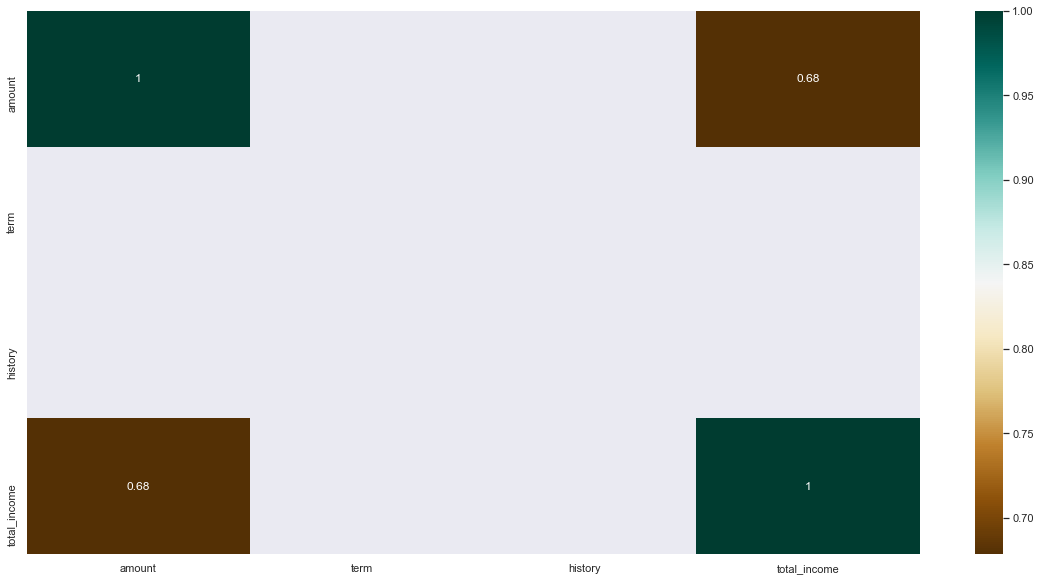

In [33]:
plt.figure(figsize = (20,10))
c = loan.corr()
sns.heatmap(c, cmap = "BrBG", annot = True)
c

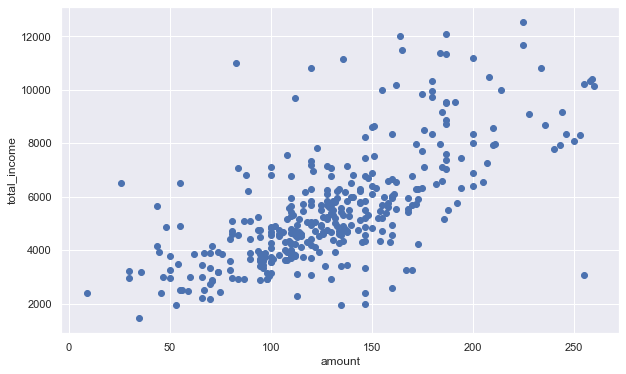

In [34]:
fig,ax = plt.subplots(figsize = (10,6))
ax.scatter(loan["amount"], loan["total_income"])
ax.set_xlabel("amount")
ax.set_ylabel("total_income")
plt.show()

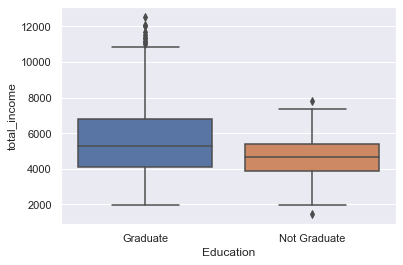

In [35]:
sns.boxplot(x = "Education", y = "total_income", data = loan)

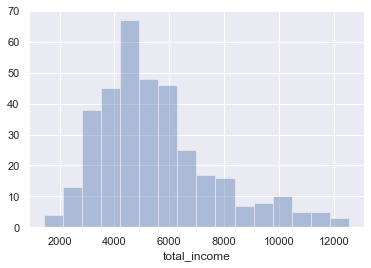

In [36]:
sns.distplot(loan.total_income,kde = False)

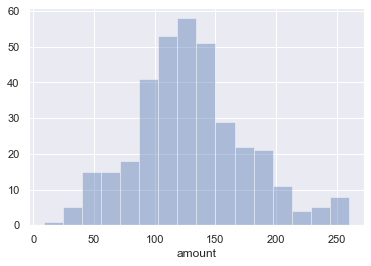

In [37]:
sns.distplot(loan.amount,kde = False)

## .test data set

In [38]:
loan_test = pd.read_csv("test.csv")

In [39]:
loan_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [40]:
loan_test.shape

(367, 12)

In [41]:
loan_test = loan_test.drop(["Loan_ID","Gender","Married","Dependents"], axis=1)

In [42]:
loan_test

,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...
362,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [43]:
loan_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [44]:
loan_test = loan_test.rename(columns={"ApplicantIncome" : "income", "CoapplicantIncome" : "co_income", "LoanAmount" : "amount"})

In [45]:
loan_test = loan_test.rename(columns={"Loan_Amount_Term" : "term", "Credit_History" : "history", "Property_Area" : "area"})

In [46]:
loan_test = loan_test.rename(columns={"Loan_Status" : "status"})

In [47]:
loan_test.head()

,Education,Self_Employed,income,co_income,amount,term,history,area
0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [48]:
loan_test.shape

(367, 8)

In [49]:
loan_test.count()

Education        367
Self_Employed    344
income           367
co_income        367
amount           362
term             361
history          338
area             367
dtype: int64

In [50]:
duplicate_rows_loan_test = loan_test[loan_test.duplicated()]
print("number of duplicate rows:", duplicate_rows_loan_test.shape)

number of duplicate rows: (1, 8)


In [51]:
loan_test = loan_test.drop_duplicates()

In [52]:
loan_test["amount"].fillna(loan_test["amount"].mean(), inplace = True)

In [53]:
loan_test.count()

Education        366
Self_Employed    343
income           366
co_income        366
amount           366
term             360
history          337
area             366
dtype: int64

In [54]:
loan_test["amount"].fillna(loan_test["amount"].mean(), inplace = True)

In [55]:
loan_test["term"].fillna(loan_test["term"].mean(), inplace = True)

In [56]:
loan_test["history"].fillna(loan_test["history"].mean(), inplace = True)

In [57]:
loan_test["Self_Employed"].fillna(loan_test["Self_Employed"].mode()[0], inplace = True)

In [58]:
loan_test.count()

Education        366
Self_Employed    366
income           366
co_income        366
amount           366
term             366
history          366
area             366
dtype: int64

In [59]:
loan_test["total_income"] = loan_test["income"] + loan_test["co_income"]

In [60]:
loan_test = loan_test.drop(["income","co_income",], axis=1)

In [61]:
loan_test.head()

,Education,Self_Employed,amount,term,history,area,total_income
0,Graduate,No,110.0,360.0,1.000000,Urban,5720
1,Graduate,No,126.0,360.0,1.000000,Urban,4576
2,Graduate,No,208.0,360.0,1.000000,Urban,6800
3,Graduate,No,100.0,360.0,0.824926,Urban,4886
4,Not Graduate,No,78.0,360.0,1.000000,Urban,3276


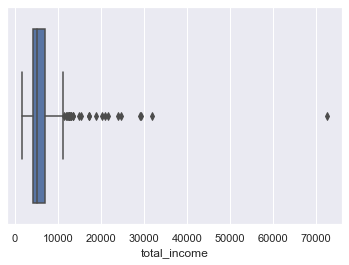

In [62]:
sns.boxplot(x = loan_test["total_income"])

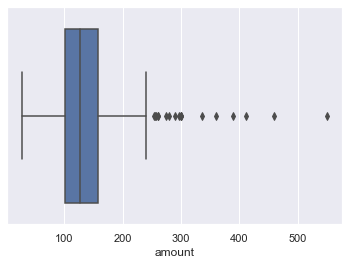

In [63]:
sns.boxplot(x = loan_test["amount"])

In [64]:
Q1 = loan_test.quantile(0.25)
Q3 = loan_test.quantile(0.75)
IQR = Q3-Q1
print(IQR)

amount            56.75
term               0.00
history            0.00
total_income    2843.50
dtype: float64


In [65]:
loan_test = loan_test[~((loan_test < (Q1-1.5 * IQR)) |(loan_test > (Q3+1.5 * IQR))).any(axis = 1)]
loan_test.shape

(212, 7)

In [66]:
from sklearn.preprocessing import LabelEncoder
encod = LabelEncoder()
loan_test.loc[:,["Education", "Self_Employed", "area"]] = \
loan_test.loc[:,["Education", "Self_Employed", "area"]].apply(encod.fit_transform)
loan_test.head()     

,Education,Self_Employed,amount,term,history,area,total_income
0,0,0,110.0,360.0,1.0,2,5720
1,0,0,126.0,360.0,1.0,2,4576
2,0,0,208.0,360.0,1.0,2,6800
4,1,0,78.0,360.0,1.0,2,3276
5,1,1,152.0,360.0,1.0,2,5587


In [67]:
X_train = loan_test[:]

In [68]:
X_train.shape

(212, 7)

In [69]:
loan.shape

(357, 8)

### checking the data

In [70]:
from sklearn.preprocessing import LabelEncoder
encod = LabelEncoder()
loan.loc[:,["Education", "Self_Employed", "area", "status"]] = \
loan.loc[:,["Education", "Self_Employed", "area", "status"]].apply(encod.fit_transform)
loan.head()     

,Education,Self_Employed,amount,term,history,area,status,total_income
0,0,0,146.473773,360.0,1.0,2,1,5849.0
1,0,0,128.000000,360.0,1.0,0,0,6091.0
2,0,1,66.000000,360.0,1.0,2,1,3000.0
3,1,0,120.000000,360.0,1.0,2,1,4941.0
4,0,0,141.000000,360.0,1.0,2,1,6000.0


In [71]:
columns = loan.columns.tolist()
columns = [c for c in columns if c not in ["status"]]

In [72]:
target = "status"

In [73]:
state = np.random.RandomState(50)

In [74]:
x = loan[columns]
y = loan[target]

In [75]:
print(x.shape)
print(y.shape)

(357, 7)
(357,)


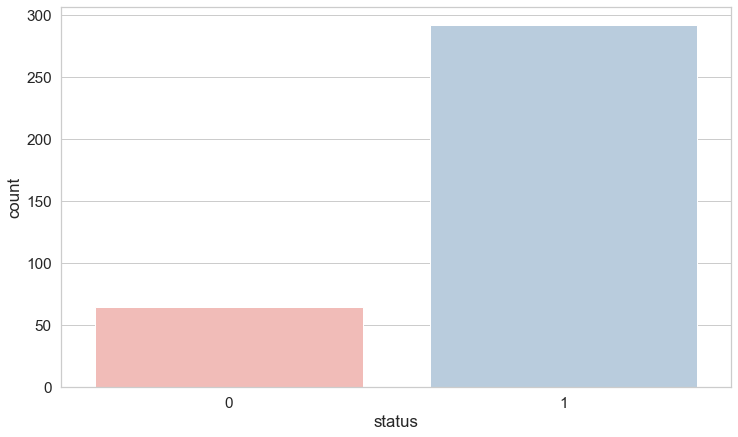

In [76]:
sn.set(style = "whitegrid", font_scale = 1.4)
plt.subplots(figsize = (12,7))
sn.countplot(x = "status", data = loan, palette = ("Pastel1"))

In [77]:
yes = loan[loan["status"]==1]
no = loan[loan["status"]==0]

In [78]:
print(yes.shape, no.shape)

(292, 8) (65, 8)


### SMOTE

In [79]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [80]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'not majority', random_state = 50)

In [81]:
x_smote,y_smote = smote.fit_resample(x,y)


In [82]:
y_smote.value_counts()

1    292
0    292
Name: status, dtype: int64

In [83]:
y_smote.count()

584

In [84]:
y_smote.shape,x_smote.shape

((584,), (584, 7))

In [85]:
from collections import Counter
print("original database shape :" ,Counter(y))
print("resampled database shape :" ,Counter(y_smote))

original database shape : Counter({1: 292, 0: 65})
resampled database shape : Counter({1: 292, 0: 292})


### modelling

In [86]:
loan

,Education,Self_Employed,amount,term,history,area,status,total_income
0,0,0,146.473773,360.0,1.0,2,1,5849.0
1,0,0,128.000000,360.0,1.0,0,0,6091.0
2,0,1,66.000000,360.0,1.0,2,1,3000.0
3,1,0,120.000000,360.0,1.0,2,1,4941.0
4,0,0,141.000000,360.0,1.0,2,1,6000.0
...,...,...,...,...,...,...,...,...
607,1,0,157.000000,360.0,1.0,0,1,5398.0
608,0,0,108.000000,360.0,1.0,0,1,5182.0
609,0,0,71.000000,360.0,1.0,0,1,2900.0
611,0,0,253.000000,360.0,1.0,2,1,8312.0


### kneighbors classifier

In [93]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = \
train_test_split(x_smote,y_smote, test_size = 0.3, random_state = 10)

In [94]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

In [95]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_predict))

0.6875


In [96]:
pd.crosstab(y_test, y_predict)

col_0,0,1
status,,
0,57,25
1,30,64


##### training on test sample data

In [100]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_predict = model.predict(X_train)

In [103]:
x_train.shape , X_train.shape

((408, 7), (212, 7))

In [ ]:
pd.crosstab(y_train, y_predict)

## decision tree classifier

In [ ]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree

In [ ]:
model_dt = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model_dt.fit(x_train,y_train)

#### predicting on train data set

In [ ]:
preds_train_dt = model_dt.predict(x_train) 
pd.Series(preds_train_dt).value_counts()

In [ ]:
accuracy_train = accuracy_score(y_train,preds_train_dt)
print(accuracy_train)

In [ ]:
pd.crosstab(y_train,preds_train_dt)

#### predicting on test data set

In [ ]:
preds_test_dt  = model_dt.predict(x_test) 
pd.Series(preds_test_dt).value_counts()

In [ ]:
accuracy_test = accuracy_score(y_test,preds_test_dt)
print(accuracy_test)

In [ ]:
pd.crosstab(y_test,preds_test_dt)

In [ ]:
print(classification_report(y_test,preds_test_dt))

#### for test sample data

In [ ]:
model_dt = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model_dt.fit(x_train,y_train)
preds_test_dt  = model_dt.predict(X_train) 
pd.Series(preds_test_dt).value_counts()

In [ ]:
X_train.shape, y_train.shape

In [ ]:
accuracy_test = accuracy_score(y_train,preds_test_dt)
print(accuracy_test)

## random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_new = RandomForestClassifier(n_estimators=140,max_depth=5,min_samples_split=20,criterion='gini')
forest_new.fit(x_train, y_train)

#### predicting on train data set

In [ ]:
pred_rf_train = forest_new.predict(x_train) 
pd.Series(pred_rf_train).value_counts()

In [ ]:
pd.crosstab(y_train,pred_rf_train)

In [ ]:
accuracy = accuracy_score(y_train,pred_rf_train)
print(accuracy)

#### predicting on test data set

In [ ]:
pred_rf_test  = forest_new.predict(x_test) 
pd.Series(pred_rf_test).value_counts()

In [ ]:
accuracy_test = accuracy_score(y_test,pred_rf_test)
print(accuracy_test)

In [ ]:
pd.crosstab(y_test,pred_rf_test)

In [ ]:
print(classification_report(y_test,pred_rf_test))

#### for test sample data

In [ ]:
pred_rf_test  = forest_new.predict(X_train) 
pd.Series(pred_rf_test).value_counts()

## xgboost classifier

In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_model = XGBClassifier(max_depth=4,n_estimators=200)
xgb_model.fit(x_train, y_train)

y_pred_xgb = xgb_model.predict(x_test)

accuracy = accuracy_score(y_test,y_pred_xgb)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
print(classification_report(y_test,y_pred_xgb))